In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trips = pd.read_csv('tp_bike/trip.csv')
weather = pd.read_csv('tp_bike/weather.csv')

In [3]:
trips.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [4]:
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [5]:
# Veo el problema del zip_code que esta en object , lo deberia pasar a int
print (trips[pd.to_numeric(trips.zip_code,errors='coerce').isnull()])['zip_code']

86        NaN
181       NaN
193       NaN
253       NaN
316       NaN
354       NaN
387       NaN
421       NaN
429       NaN
477       NaN
481       NaN
483       NaN
545       NaN
554       NaN
560       NaN
588       NaN
600       NaN
603       NaN
617       NaN
619       NaN
620       NaN
622       NaN
627       NaN
630       NaN
635       NaN
660       NaN
662       NaN
671       NaN
697       NaN
698       NaN
         ... 
669698    nil
669699    nil
669701    nil
669702    nil
669703    nil
669704    nil
669705    nil
669706    nil
669710    nil
669733    nil
669740    nil
669741    nil
669750    nil
669751    nil
669756    nil
669757    nil
669819    nil
669820    nil
669821    nil
669830    nil
669841    nil
669842    nil
669866    nil
669886    nil
669887    nil
669935    nil
669936    nil
669939    nil
669940    nil
669944    nil
Name: zip_code, dtype: object


In [6]:
#cambio a numerico
trips.zip_code = trips.zip_code.str.replace('nil','')
trips.zip_code = pd.to_numeric(trips.zip_code,errors='coerce')
trips.dtypes

id                      int64
duration                int64
start_date             object
start_station_name     object
start_station_id        int64
end_date               object
end_station_name       object
end_station_id          int64
bike_id                 int64
subscription_type      object
zip_code              float64
dtype: object

In [7]:
weather.head(3)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107


In [8]:
##Cantidad de Viajes por ZIP CODE
trips.groupby('zip_code').count().sort_values('start_station_name',ascending=False).head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type
zip_code,,,,,,,,,,
94107.0,78704,78704,78704,78704,78704,78704,78704,78704,78704,78704
94105.0,42672,42672,42672,42672,42672,42672,42672,42672,42672,42672
94133.0,31359,31359,31359,31359,31359,31359,31359,31359,31359,31359
94103.0,26673,26673,26673,26673,26673,26673,26673,26673,26673,26673
94111.0,21409,21409,21409,21409,21409,21409,21409,21409,21409,21409
94102.0,19757,19757,19757,19757,19757,19757,19757,19757,19757,19757
94109.0,13989,13989,13989,13989,13989,13989,13989,13989,13989,13989
95112.0,11564,11564,11564,11564,11564,11564,11564,11564,11564,11564
94117.0,9851,9851,9851,9851,9851,9851,9851,9851,9851,9851


In [9]:
#Localizo las estaciones que empezaron en una estacion y terminaron en otra 
# Saco las que tienen pocas (ecuacion mas peligrosa) los que tienen mas de 500 viajes
#Saco el top 10 de las duraciones por nombre de estacion inicial
viajesDistintasEstaciones = trips.loc[trips.start_station_name != trips.end_station_name,['start_station_name','duration']]
agrupadoViajesDistintos = viajesDistintasEstaciones.groupby('start_station_name').agg(['count','mean'])
topDuracionViajesEntreEstaciones = agrupadoViajesDistintos[agrupadoViajesDistintos['duration','count'] > 500 ]\
    ['duration','mean'].sort_values(ascending=False)
topDuracionViajesEntreEstaciones

start_station_name
University and Emerson                           3974.757282
California Ave Caltrain Station                  2612.371464
South Van Ness at Market                         2312.118846
Rengstorff Avenue / California Street            2210.418989
San Jose Civic Center                            2209.133001
Palo Alto Caltrain Station                       2169.851895
Park at Olive                                    2120.227273
San Antonio Shopping Center                      1773.581182
Arena Green / SAP Center                         1631.973396
Washington at Kearney                            1585.978308
San Francisco City Hall                          1537.388798
Redwood City Caltrain Station                    1475.982130
Embarcadero at Vallejo                           1441.692840
Japantown                                        1415.693452
Castro Street and El Camino Real                 1410.933831
Washington at Kearny                             1404.127523
Cowpe

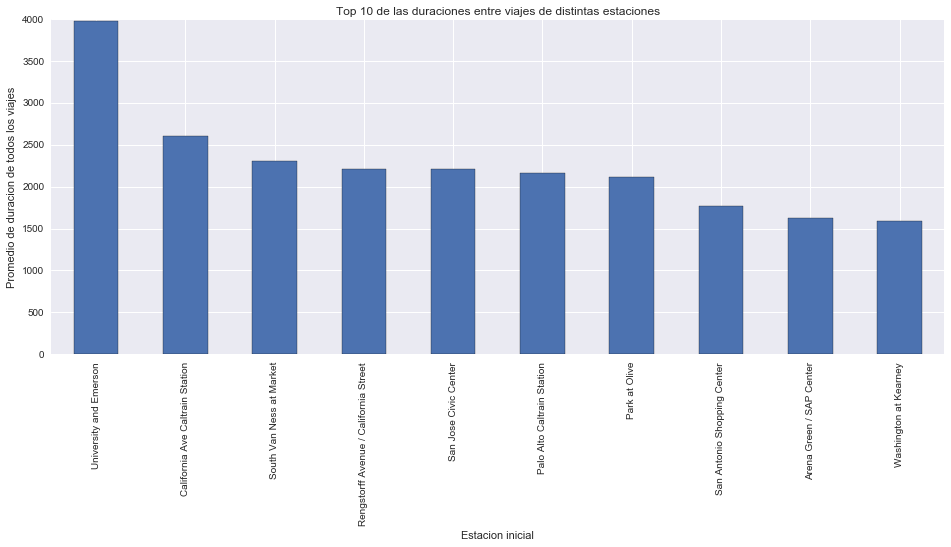

In [10]:
#Hago un plot de lo anterior
plt.figure()
plt.title('Top 10 de las duraciones entre viajes de distintas estaciones')
topDuracionViajesEntreEstaciones = topDuracionViajesEntreEstaciones.head(10)
topDuracionViajesEntreEstaciones.plot('bar',figsize= (16, 6))
plt.xlabel('Estacion inicial')
plt.ylabel('Promedio de duracion de todos los viajes')

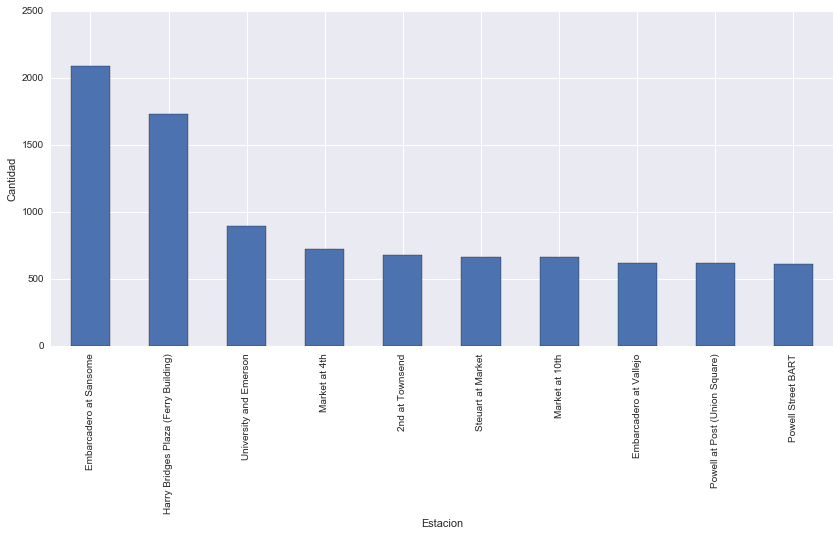

In [11]:
##Cantidad de viajes de una estacion a la misma
plt.figure('Top 10 cantidad de viajes desde una estacion a la misma')
trips.loc[trips.start_station_name == trips.end_station_name,'start_station_name'].value_counts().head(10)\
    .plot('bar',figsize=(14,6))
plt.ylabel('Cantidad')
plt.xlabel('Estacion')

# Cantidad de viajes entre distintas estaciones por  ej: NY -> LA o LA -> NY

In [12]:
#Cantidad de viajes entre distintas estaciones por  ej: NY -> LA o LA -> NY
entreEstacionesDistintas = trips.loc\
    [trips.start_station_name != trips.end_station_name,['start_station_name','end_station_name']]

In [13]:
# creo una nueva columna iniciandizandolas en 1
entreEstacionesDistintas['contador'] = 1

In [14]:
## Cambio de lugar las estaciones de comienzo y las finaless
entreEstacionesDistintasFinales = pd.DataFrame(entreEstacionesDistintas)
entreEstacionesDistintasFinales.rename(columns=\
                            {'start_station_name':'end_station_name','end_station_name':'start_station_name'},inplace=True)
entreEstacionesDistintasFinales

,end_station_name,start_station_name,contador
4,South Van Ness at Market,Market at 10th,1
6,Santa Clara at Almaden,Adobe on Almaden,1
9,San Jose City Hall,MLK Library,1
10,Spear at Folsom,Embarcadero at Bryant,1
11,San Pedro Square,Santa Clara at Almaden,1
14,Clay at Battery,Beale at Market,1
18,Steuart at Market,Harry Bridges Plaza (Ferry Building),1
19,Powell Street BART,Market at 4th,1
20,Spear at Folsom,Embarcadero at Bryant,1
23,Post at Kearney,Market at Sansome,1


In [15]:
#Trato de sumar 
pd.DataFrame({'count' : entreEstacionesDistintas.groupby(['start_station_name','end_station_name']).size()}).reset_index()
## Es mejor usar la forma que esta abajo, pero dejo esta por si las moscas

,start_station_name,end_station_name,count
0,2nd at Folsom,2nd at South Park,704
1,2nd at Folsom,2nd at Townsend,825
2,2nd at Folsom,5th at Howard,323
3,2nd at Folsom,Beale at Market,229
4,2nd at Folsom,Broadway St at Battery St,101
5,2nd at Folsom,Civic Center BART (7th at Market),179
6,2nd at Folsom,Clay at Battery,471
7,2nd at Folsom,Commercial at Montgomery,214
8,2nd at Folsom,Davis at Jackson,116
9,2nd at Folsom,Embarcadero at Bryant,242


In [16]:
#Otra forma de poner contador
contadorEstacionesDistintasIniciales = entreEstacionesDistintas.groupby(['start_station_name','end_station_name']).sum()\
        .reset_index().sort_values('contador',ascending=False)
contadorEstacionesDistintasIniciales

,start_station_name,end_station_name,contador
1343,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6216
687,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6164
1713,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041
87,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4839
677,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357
544,Embarcadero at Sansome,Steuart at Market,4269
503,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3967
1617,Steuart at Market,2nd at Townsend,3903
55,2nd at South Park,Market at Sansome,3627
1289,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3622


# Esta celda de abajo es para verificacion ... borrar despues

In [17]:
## uso esta para verificar las estaciones finales a iniciales de San Francisco Caltrain 2 (330 Townsend)
# lo hago para verificar que despues me de el resultado bien
contadorEstacionesDistintasIniciales.loc[contadorEstacionesDistintasIniciales\
                                         ['end_station_name'] == 'San Francisco Caltrain 2 (330 Townsend)',:]
#En en resultado se ve San Francisco Caltrain 2 (330 Townsend)->Townsend at 7th -> 6216
#y aca Townsend at 7th-> San Francisco Caltrain 2 (330 Townsend) ->3495
#la suma deberia dar 9711

,start_station_name,end_station_name,contador
1714,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),3495
1102,Powell Street BART,San Francisco Caltrain 2 (330 Townsend),2854
1642,Steuart at Market,San Francisco Caltrain 2 (330 Townsend),2103
808,Market at 10th,San Francisco Caltrain 2 (330 Townsend),2083
1678,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain 2 (330 Townsend),2022
136,5th at Howard,San Francisco Caltrain 2 (330 Townsend),1732
504,Embarcadero at Folsom,San Francisco Caltrain 2 (330 Townsend),1572
701,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain 2 (330 Townsend),1391
882,Market at Sansome,San Francisco Caltrain 2 (330 Townsend),1303
62,2nd at South Park,San Francisco Caltrain 2 (330 Townsend),1283


In [18]:
contadorEstacionesDistintasFinales = entreEstacionesDistintasFinales.groupby(['start_station_name','end_station_name'])\
                            .count().reset_index().sort_values('contador',ascending=False)
contadorEstacionesDistintasFinales

,start_station_name,end_station_name,contador
1714,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6216
532,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),6164
1307,San Francisco Caltrain (Townsend at 4th),Townsend at 7th,5041
684,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4839
87,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4357
1627,Steuart at Market,Embarcadero at Sansome,4269
1280,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3967
102,2nd at Townsend,Steuart at Market,3903
865,Market at Sansome,2nd at South Park,3627
707,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),3622


# Merge

In [19]:
# Los mergeo entre estaciones iniciales y finales que ya fueron sumados sus contadores, de forma INNER para que
# mezcle solo los que coincidan y no me haga datos repetidos
contadorEstacionesDistintasTotales = pd.merge(contadorEstacionesDistintasIniciales,contadorEstacionesDistintasFinales,\
                                             on=['start_station_name','end_station_name'],how='inner')

In [20]:
contadorEstacionesDistintasTotales

,start_station_name,end_station_name,contador_x,contador_y
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6216,3495
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6164,3231
2,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041,2320
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4839,4357
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357,4839
5,Embarcadero at Sansome,Steuart at Market,4269,3116
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3967,3031
7,Steuart at Market,2nd at Townsend,3903,2877
8,2nd at South Park,Market at Sansome,3627,3427
9,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3622,3033


In [21]:
# Defino una funcion para sumar los dos contadores
def sumarContadores(x):
    return x[2] + x[3]

In [22]:
# aplico la funcion en el dataframe para sumar las columnas de contadores asi devuelve una serie con los resultados
sumaDeContadores = contadorEstacionesDistintasTotales.apply(sumarContadores,axis=1)

In [23]:
# Creo una columna llamada "contador" que tiene el resultado final que se buscaba
contadorEstacionesDistintasTotales['contador'] = sumaDeContadores

In [24]:
contadorEstacionesDistintasTotales

,start_station_name,end_station_name,contador_x,contador_y,contador
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6216,3495,9711
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6164,3231,9395
2,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041,2320,7361
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4839,4357,9196
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357,4839,9196
5,Embarcadero at Sansome,Steuart at Market,4269,3116,7385
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3967,3031,6998
7,Steuart at Market,2nd at Townsend,3903,2877,6780
8,2nd at South Park,Market at Sansome,3627,3427,7054
9,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3622,3033,6655


In [25]:
# saco las columnas que estan de mas
del contadorEstacionesDistintasTotales['contador_x']
del contadorEstacionesDistintasTotales['contador_y']

In [26]:
contadorEstacionesDistintasTotales = contadorEstacionesDistintasTotales.sort_values('contador',ascending=False)
contadorEstacionesDistintasTotales

,start_station_name,end_station_name,contador
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,9711
12,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),9711
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9395
16,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),9395
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),9196
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,9196
5,Embarcadero at Sansome,Steuart at Market,7385
18,Steuart at Market,Embarcadero at Sansome,7385
2,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),7361
36,San Francisco Caltrain (Townsend at 4th),Townsend at 7th,7361


In [27]:
## Recorro el dataframe para borrarles los que coinciden iniciales y finales
# Primero agrupo
grouped = contadorEstacionesDistintasTotales.groupby(['start_station_name','end_station_name'])
# Me creo otro dataframe
aBorrar = pd.DataFrame(contadorEstacionesDistintasTotales)
#Creo una lista vacia para ir agregando las estaciones ya cargadas
lista = []

for estacion,grupo in grouped:
#    print(estacion)
# Agarro la primera estacion y la "doy vuelta"
    estacionActual = (estacion[1],estacion[0])
# Si la estacion Actual (la que esta dada vuelta ) no esta en la lista la cargo, despues verifico si esta en el data frame
# la estacion a verificar y me quedo con los que no son iguales (Saco solo la que esta dada vuelta)
    if not(estacionActual) in lista:
        #Agrego a la lista
        lista.append(estacion)
        #Hago un loc para quedarme con la parte del dataframe que necesito
        aBorrar = aBorrar.loc[(estacion[0] != aBorrar['end_station_name'] ) | \
                    ((estacion[1] != aBorrar['start_station_name'])),:]
        

In [28]:
# Saco el top 10 de la cantidad de viajes entre distintas estaciones 
top10 = aBorrar.head(10)
top10

,start_station_name,end_station_name,contador
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,9711
16,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),9395
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),9196
5,Embarcadero at Sansome,Steuart at Market,7385
36,San Francisco Caltrain (Townsend at 4th),Townsend at 7th,7361
8,2nd at South Park,Market at Sansome,7054
11,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),7036
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6998
22,2nd at Townsend,Steuart at Market,6780
19,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),6655
